# CUSTOMER SEGMENTATION ANALYSIS

### Importing libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [33]:
data=pd.read_csv('Mall_Customers.csv')

In [24]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
data.shape

(200, 5)

In [26]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

### Data Exploration and Cleaning

In [10]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [11]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
# Convert categorical variables (like 'Gender') into numerical format for modeling
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Check cleaned data
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


### Descriptive Statistics

In [16]:
avg_income = data['Annual Income (k$)'].mean()
avg_spending_score = data['Spending Score (1-100)'].mean()

print(f"Average Annual Income: {avg_income}k$")
print(f"Average Spending Score: {avg_spending_score}")

Average Annual Income: 60.56k$
Average Spending Score: 50.2


###  Customer Segmentation (Clustering with K-Means)

###### 1.Feature Selection: We'll select relevant features (e.g., Age, Annual Income, Spending Score).
###### 2.Feature Scaling: It’s important to scale features for better clustering performance.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering to segment customers into 5 clusters (can adjust the number of clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Preview the data with cluster labels
print(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        3
3   23                  16                      77        2
4   31                  17                      40        2


### Visualization

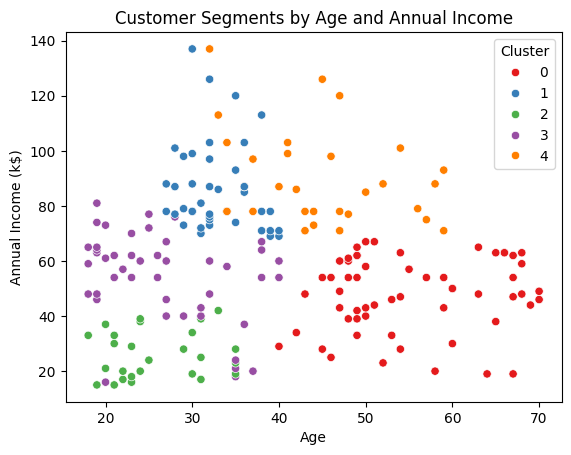

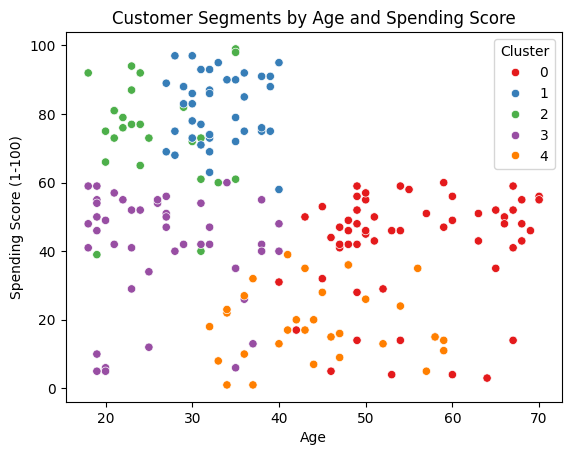

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters based on Age and Annual Income
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Set1')
plt.title('Customer Segments by Age and Annual Income')
plt.show()

# Visualize clusters based on Age and Spending Score
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments by Age and Spending Score')
plt.show()

### Insights 

In [21]:
# Analyze each cluster's characteristics
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster} Statistics:")
    print(cluster_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())


Cluster 2 Statistics:
             Age  Annual Income (k$)  Spending Score (1-100)
count  26.000000           26.000000               26.000000
mean   25.769231           26.115385               74.846154
std     5.435496            8.557228               15.069684
min    18.000000           15.000000               39.000000
25%    21.250000           19.000000               67.500000
50%    24.000000           24.500000               75.500000
75%    30.750000           33.000000               81.750000
max    35.000000           42.000000               99.000000

Cluster 3 Statistics:
             Age  Annual Income (k$)  Spending Score (1-100)
count  45.000000           45.000000               45.000000
mean   26.733333           54.311111               40.911111
std     7.085196           16.162277               16.285552
min    18.000000           16.000000                5.000000
25%    20.000000           46.000000               35.000000
50%    26.000000           59.000000   

### RECOMMENDATIONS

1. Target Cluster 0 with special promotions or budget-friendly products.

2. Offer premium services to Cluster 1 customers to enhance customer satisfaction.

3. For Cluster 2, consider implementing personalized marketing campaigns.